<a href="https://colab.research.google.com/github/itsvipa/ctm-codebar-nov-22-planning/blob/main/codebar_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for Living (Python for Data Engineering)

In this session we’ll be taking a look at harnessing the power of data to aid decision making for things like groceries and everyday purchases. We’ll get hands on with sourcing and making sense of the data, and then using it to answer some interesting questions, using techniques from fields like optimisation and machine learning.

### Tasks:
1. Find the cheapest supermarket for a given shopping basket
2. Find out if you can save money by shopping at multiple stores.
3. Use nutritional information to find healthy, cheap alternatives (Optional)
4. Categorize the products and compare them using machine learning (Optional)

### Before you start:
Run the command below to download the data needed for this exercise. There should be three .csv files downloaded: 

*   products.csv
*   prices.csv
*   nutrition_small.csv.gz

NOTE: A command is a way for users to send 
instructions to the computer for it to process. In this case, the command is asking the `git` tool to copy the files from this location in github into this notebook environment.

In [6]:
!git clone https://github.com/itsvipa/ctm-codebar-nov-22.git

Cloning into 'ctm-codebar-nov-22'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


## Task 1 - Find the cheapest supermarket for your groceries

First, import pandas into your program:

In [24]:
import pandas as pd

Pandas is a python library that is used for data manipulation and analysis by data into DataFrames this data can be in the form of dictionaries, TSVs CSVs and more. More info on Pandas can be found at https://pandas.pydata.org/ and https://realpython.com/pandas-read-write-files/ 


For this exercise, we are going to use the following list of items - match sure to run the cell below and load them in!

In [25]:
basket = [
    [28798, "Tetley Original Tea Bags x240"], 
    [34398, "Cravendale Whole Milk"],
    [30904, "Kellogg's Rice Krispies"],
    [26457,	"Tropicana Pineapple Juice"],
    [28095, "Diet Coke Bottles"],
    [33442, "Loyd Grossman Tomato & Basil Pasta Sauce"],
    [27161,	"Strings & Things Cheestrings Cheese Snack"],
    [31863,	"Mars 4 pack Ice Cream Bars"],
    [32002,	"Tilda Microwave Coconut Basmati Rice"],
    [86547,	"Knorr Chicken Stock Pot 4 Pack"],
    [84095,	"Arla skyr Fat Free Natural Yogurt"],
    [33255,	"Alpro Almond Long Life Drink"],
    [43809,	"Energizer Max 9V Batteries"],
    [25828,	"Robinsons Crushed Lime & Mint Fruit Cordial"],
    [32248,	"Sensations Balsamic Vinegar & Caramelised Onion Sharing Crisps"],
    [47361,	"Lynx Africa Body Spray Deodorant Aerosol"],
    [32774,	"Heinz Spaghetti"],
    [92101,	"Chicago Town Cheese Pizza Tomato Stuffed Crust Takeaway"],
    [110105, "McCain Home Chips Straight"],
    [44797,	"Fairy Original Washing Up Liquid"],
    [40915, "Fairy Non Bio Washing Liquid for Sensitive Skin 1.33L 38 Washes"],
    [24091,	"Nissin Soba Yakitori Noodles"],
    [42002,	"Yakult Yogurt Drink"],	
    [83092,	"Jammie Dodgers"],
    [20272,	"Quorn Vegan Chicken Free Slices 100G"],	
    [33492,	"Linda McCartney's Mozzarella Quarter Pounder Burger"],
    [51657,	"Purina ONE Adult Dry Cat Food Chicken & Wholegrains"],
    [24341,	"Birds Eye 4 Original Beef Burgers With Onions"],
    [109986, "Cathedral City Lighter Mature Cheese"],
    [27526,	"Filippo Berio Mild & Light Olive Oil"],
    [45238, "Bfree Pitta Breads Stone Baked Pittas"]
    ]

print(len(basket))

31


### Load the data 

The first step to get price create two DataFrames for the product and price.

`product.csv` is list of all the products we found on https://priceable.co.uk/, and should contain information on the product name, the quantity, the product id etc

`price.csv` is a list of the prices of the products above at different supermarkets, from the same website, and should contain infomation on the product price, the supermarket name, the product name etc

A pandas DataFrame is a nice easy way of storing table data in Python.

Using the `pd.read_csv` method will take a csv and put it into a pandas DataFrame for us to use.



In [26]:
product_df = pd.read_csv("/content/ctm-codebar-nov-22/products.csv")
price_df = pd.read_csv("/content/ctm-codebar-nov-22/prices.csv")

To show what the DataFrame actually looks like, we can just call the dataframe, like below

In [27]:
product_df

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count
0,20100,Lucozade Sport Orange,NaN,750,ml,"['302012236', '50368011', '1000273982470']",1
1,20101,Red Bull Sugarfree,NaN,473,ml,"['298026024', '7922076', '576040011']",3
2,20102,All Shook Up Spritz Pink Grapefruit & Lavender...,NaN,NaN,NaN,['305986034'],0
3,20103,Gatorade Orange 500ml,NaN,NaN,NaN,"['287043066', '8008530']",0
4,20104,Purdeys Rejuvenation Fruit Drink 330Ml,NaN,330,ml,"['272855015', '7720116', '14533011', '34395901...",3
...,...,...,...,...,...,...,...
81665,149214,TRIP CBD Infused Elderflower Mint,NaN,250,ml,"['8040121', '563191011']",2
81666,149215,TRIP CBD Infused Lemon Basil,NaN,250,ml,"['8040125', '563190011']",2
81667,149216,TRIP CBD Infused Peach Ginger,NaN,250,ml,"['8040137', '563192011']",2
81668,149596,Smirnoff Red Label Vodka 35cl,NaN,350,ml,"['256554689', '2412368', '119513011']",2


Try and call the price_df DataFrame and have a look at some of the data. Can you see any similaries between the two?

In [28]:
#call the price_df
price_df

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
0,20100,Lucozade Sport Orange,asda,True,1.25,0.17,100.0,ml,2022-10-26T15:00:00.000Z
1,20101,Red Bull Sugarfree,morrisons,True,2.30,0.49,100.0,ml,2022-10-26T18:00:00.000Z
2,20101,Red Bull Sugarfree,sainsburys,True,2.30,0.49,100.0,ml,2022-10-26T11:00:00.000Z
3,20101,Red Bull Sugarfree,tesco,False,3.40,0.49,100.0,ml,2022-10-26T14:00:00.000Z
4,20104,Purdeys Rejuvenation Fruit Drink 330Ml,sainsburys,True,1.40,0.42,100.0,ml,2022-10-26T12:00:00.000Z
...,...,...,...,...,...,...,...,...,...
94855,149216,TRIP CBD Infused Peach Ginger,ocado,True,2.00,0.80,100.0,ml,2022-10-26T14:00:00.000Z
94856,149216,TRIP CBD Infused Peach Ginger,sainsburys,True,2.00,0.80,100.0,ml,2022-10-26T12:00:00.000Z
94857,149596,Smirnoff Red Label Vodka 35cl,tesco,True,10.00,2.86,100.0,ml,2022-10-26T10:00:00.000Z
94858,149596,Smirnoff Red Label Vodka 35cl,sainsburys,True,10.50,3.00,100.0,ml,2022-10-26T11:00:00.000Z


### Get the basket ids

The id column for both prices and product are the exact same. This means that the ids can be used to find the products and their price, within the price dataset. To do this, first a list of the ids for the basket is needed

Using a for loop, get a list of the product ids from the basket object

In [29]:
# Create a list of the basket ids
basket_ids = [i[0] for i in basket]

Return the basket ids to check that the list is correct

In [30]:
# Return the list of basket ids
basket_ids

[28798,
 34398,
 30904,
 26457,
 28095,
 33442,
 27161,
 31863,
 32002,
 86547,
 84095,
 33255,
 43809,
 25828,
 32248,
 47361,
 32774,
 92101,
 110105,
 44797,
 40915,
 24091,
 42002,
 83092,
 20272,
 33492,
 51657,
 24341,
 109986,
 27526,
 45238]

The next step is to figure out which rows in the product dataframe having matching ids to the list we just made. We are going to do this using a method called `.isin()`, which looks at each row, and returns `True` or `False` based on whether the row is in a given list.

In [31]:
#This creates a series of true/false values
product_match = product_df['id'].isin(basket_ids)
product_match

0        False
1        False
2        False
3        False
4        False
         ...  
81665    False
81666    False
81667    False
81668    False
81669    False
Name: id, Length: 81670, dtype: bool

A cool feature of pandas is that you can take a series of boolean (True/False) values like the one we made above (`product_match`) and use it to filter tables, by putting it within the square brackets like below:

In [32]:
product_basket = product_df[product_match]

What this does, is go through the series and table rows together, side by side, and one by one:
- keeps the row if it has have value `True` in the series.
- hides the row if it have value `False` in the series.

To make sure it does this correctly, the number of table rows and number of values in the series need to be the same (which is usually true, when we make the Series directly from the table like above).

You can see the result of this below:

In [33]:
product_basket

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count
171,20272,Quorn Vegan Chicken Free Slices 100G,NaN,100,g,"['1000036534591', '409621011', '300544928', '7...",7
3920,24091,Nissin Soba Yakitori Noodles,NaN,89,g,"['7880330', '358649011', '394012011', '9100030...",7
4157,24341,Birds Eye 4 Original Beef Burgers With Onions,NaN,227,g,"['39291', '111245011', '254750569', '7062745',...",7
5577,25828,Robinsons Crushed Lime & Mint Fruit Cordial,NaN,500,ml,"['298026060', '7893476', '1000000581841', '395...",7
6168,26457,Tropicana Pineapple Juice,NaN,850,ml,"['287294534', '910001811525', '7736698', '2807...",7
6829,27161,Strings & Things Cheestrings Cheese Snack,8.0,160,g,"['910000563392', '111504011', '273196994', '75...",8
7170,27526,Filippo Berio Mild & Light Olive Oil,NaN,500,ml,"['3817506', '33508011', '112993011', '25495826...",7
7700,28095,Diet Coke Bottles,NaN,1000,ml,"['252047858', '3723975', '20947011', '11392001...",7
8338,28798,Tetley Original Tea Bags x240,240.0,750,g,"['256093024', '3124932', '113676011', '32744',...",8
10318,30904,Kellogg's Rice Krispies,NaN,700,g,"['910000396129', '7427688', '112094011', '2681...",7


### Filtering the data to find the cheapest supermarket

To filter a DataFrame in pandas you can attach a bracket to you DataFrame, then and your filtering parameters inside. In the example above, we have stated that the new DataFrame product_basket, should be made using data from the product_df, but only if the basket_ids, are in the column `id`

Using the example above, create a new DataFrame that only contains the prices of products, which match the basket_ids list

In [34]:
# Create a filtered DataFrame that only includes information on items in the basket
basket_prices = price_df[price_df['id'].isin(basket_ids)]

Return the new DataFrame to check it is correct

In [35]:
# Return the DataFrame
basket_prices

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
307,20272,Quorn Vegan Chicken Free Slices 100G,morrisons,True,2.39,2.39,100.0,g,2022-10-26T15:00:00.000Z
308,20272,Quorn Vegan Chicken Free Slices 100G,asda,True,2.40,2.40,100.0,g,2022-10-26T14:00:00.000Z
309,20272,Quorn Vegan Chicken Free Slices 100G,coop,NaN,2.40,NaN,NaN,NaN,2022-10-26T11:00:00.000Z
310,20272,Quorn Vegan Chicken Free Slices 100G,ocado,True,2.40,2.40,100.0,g,2022-10-26T09:00:00.000Z
311,20272,Quorn Vegan Chicken Free Slices 100G,sainsburys,True,2.40,2.40,100.0,g,2022-10-26T10:00:00.000Z
...,...,...,...,...,...,...,...,...,...
81291,110105,McCain Home Chips Straight,tesco,True,3.00,0.25,100.0,g,2022-10-26T07:00:00.000Z
81292,110105,McCain Home Chips Straight,morrisons,True,3.99,0.25,100.0,g,2022-10-26T16:00:00.000Z
81293,110105,McCain Home Chips Straight,asda,True,4.00,0.25,100.0,g,2022-10-26T15:00:00.000Z
81294,110105,McCain Home Chips Straight,sainsburys,True,4.00,0.25,100.0,g,2022-10-26T14:00:00.000Z


Notice in the DataFrame above, there is a column called `retailer` with all the supermarket names. We can use a pandas method called `.unique()` to get a list of all the supermarkets 

In [36]:
basket_prices['retailer'].unique()

array(['morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco',
       'waitrose', 'aldi'], dtype=object)

When filtering DataFrames in pandas, you can attach methods such as `.unique()` and `.count()` to manipulate the data further

Another method within pandas that can be useful is `.group_by()`. `.group_by()` is used to split the data into groups, where each member of the group has the same value for one (or more) of the columns that you pick.

To check that the retailers have all the products in our basket, we can use `group_by()` and `.count()` to group the data by the supermarket name, then count the number of products that supermarket has.

In [37]:
# Group the basket prices by `retailer` and count how many of the items each supermarket has 
basket_prices.groupby(['retailer']).count()

,id,name,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
retailer,,,,,,,,
aldi,3,3,3,3,3,3,3,3
asda,31,31,31,31,31,31,31,31
coop,31,31,0,31,0,0,0,31
morrisons,31,31,31,31,31,31,31,31
ocado,31,31,31,31,31,31,31,31
sainsburys,31,31,31,31,31,31,31,31
tesco,31,31,31,31,31,31,31,31
waitrose,31,31,31,31,31,31,31,31


Looking at the data above, is there any supermarket we should not include in our analysis? Why? 

there should be one supermarket, that does not have reliable data, and therefore, can be excluded from the comparison.

Next, create a list of the retailers that we DO want to test:

In [38]:
# Create list of retailers we want to compare
retailers_to_test = ['morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco', 'waitrose']

Then using the `basket_prices` DataFrame made previously, create a new DataFrame that only has the retailers we are testing

In [39]:
# Created filtered DataFrame that only has basket prices for retailers we are testing
compare_price_basket = basket_prices[basket_prices['retailer'].isin(retailers_to_test)]

In [40]:
compare_price_basket

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
307,20272,Quorn Vegan Chicken Free Slices 100G,morrisons,True,2.39,2.39,100.0,g,2022-10-26T15:00:00.000Z
308,20272,Quorn Vegan Chicken Free Slices 100G,asda,True,2.40,2.40,100.0,g,2022-10-26T14:00:00.000Z
309,20272,Quorn Vegan Chicken Free Slices 100G,coop,NaN,2.40,NaN,NaN,NaN,2022-10-26T11:00:00.000Z
310,20272,Quorn Vegan Chicken Free Slices 100G,ocado,True,2.40,2.40,100.0,g,2022-10-26T09:00:00.000Z
311,20272,Quorn Vegan Chicken Free Slices 100G,sainsburys,True,2.40,2.40,100.0,g,2022-10-26T10:00:00.000Z
...,...,...,...,...,...,...,...,...,...
81291,110105,McCain Home Chips Straight,tesco,True,3.00,0.25,100.0,g,2022-10-26T07:00:00.000Z
81292,110105,McCain Home Chips Straight,morrisons,True,3.99,0.25,100.0,g,2022-10-26T16:00:00.000Z
81293,110105,McCain Home Chips Straight,asda,True,4.00,0.25,100.0,g,2022-10-26T15:00:00.000Z
81294,110105,McCain Home Chips Straight,sainsburys,True,4.00,0.25,100.0,g,2022-10-26T14:00:00.000Z


Now we have a dataframe that contains all the products, the supermarkets and the price, we can do one more aggregation to find the cheapest supermarket.

Try grouping the data in compare_price_basket by `retailer`, and adding the price of the items in that supermarket, to find the cheapest place

In [41]:
# Group data and add prices of items for each retailer to see which is the cheapest overall
compare_price_basket.groupby('retailer').sum()['price']

retailer
asda          80.98
coop          96.20
morrisons     87.31
ocado         92.70
sainsburys    80.65
tesco         81.38
waitrose      95.75
Name: price, dtype: float64

Which supermarket was the cheapest? Are you suprised by the result??

##Task 2 - Shopping at Multiple Stores

Now that we know the cheapest supermarket overall, what happens if we decide to do our shopping in multiple supermarkets? How much money would we save if we split our shopping over more than one store?

###Store Combinations

To do this, we first need to figure all the different combinations of stores we can shop at, so we can compare the combinations.

A tool that will make our lives a lot easier is a module you can import called [itertools](https://docs.python.org/3/library/itertools.html).

First lets start by importing the module:

In [42]:
import itertools

One useful method from itertools that can be used to to this is [`.combinations()`](https://www.geeksforgeeks.org/python-itertools-combinations-function/). 

`.combinations()` takes in two arguments: 


1.   The iterator - In this case, that is the `retailers_to_test` list
2.   `r` - the size of the combinations -  2 will create pairs, 3 will create sets of 3 etc.

Using `combinations()` can you create a list of the potential pairs of supermarkets?

In [43]:
# Create a list of store combinations
retailer_pairs = [pairs for pairs in itertools.combinations(retailers_to_test, 2)]

In [44]:
#print out the list here to see if it works as expected.
retailer_pairs

[('morrisons', 'asda'),
 ('morrisons', 'coop'),
 ('morrisons', 'ocado'),
 ('morrisons', 'sainsburys'),
 ('morrisons', 'tesco'),
 ('morrisons', 'waitrose'),
 ('asda', 'coop'),
 ('asda', 'ocado'),
 ('asda', 'sainsburys'),
 ('asda', 'tesco'),
 ('asda', 'waitrose'),
 ('coop', 'ocado'),
 ('coop', 'sainsburys'),
 ('coop', 'tesco'),
 ('coop', 'waitrose'),
 ('ocado', 'sainsburys'),
 ('ocado', 'tesco'),
 ('ocado', 'waitrose'),
 ('sainsburys', 'tesco'),
 ('sainsburys', 'waitrose'),
 ('tesco', 'waitrose')]

Now we have the potential pairs, its time to find the total of the basket if you were to shop at each pair of supermarkets.

We can do this by filtering the prices to only include prices from the 2 selected supermarkets, and finding the cheapest price.

In [45]:
# Here, we are creating a function we can use later to work out cheapest basket
# for a given list of retailers
def get_cheapest_basket(retailer_list):
  '''
  Take a list of retailers, and return the total value of the cheapest basket,
  if we are only allowed to shop at those retailers
  '''

  #Using the compare_price_basket we made in task 1, keep only the supermarkets in the list.
  retailer_price_basket = compare_price_basket[compare_price_basket['retailer'].isin(retailer_list)]

  #Sort by price, keep only the cheapest price for each item id, and sum the prices all together.
  return retailer_price_basket.sort_values('price').drop_duplicates(['id'])['price'].sum()

pair_basket_prices = [[r, get_cheapest_basket(r)] for r in retailer_pairs]
pair_basket_prices

[[('morrisons', 'asda'), 78.6],
 [('morrisons', 'coop'), 83.54],
 [('morrisons', 'ocado'), 82.46],
 [('morrisons', 'sainsburys'), 77.03],
 [('morrisons', 'tesco'), 78.51],
 [('morrisons', 'waitrose'), 84.04],
 [('asda', 'coop'), 77.68],
 [('asda', 'ocado'), 78.93],
 [('asda', 'sainsburys'), 77.44],
 [('asda', 'tesco'), 76.66],
 [('asda', 'waitrose'), 80.13],
 [('coop', 'ocado'), 86.14999999999999],
 [('coop', 'sainsburys'), 78.6],
 [('coop', 'tesco'), 79.48000000000002],
 [('coop', 'waitrose'), 87.29999999999998],
 [('ocado', 'sainsburys'), 79.14999999999999],
 [('ocado', 'tesco'), 79.48],
 [('ocado', 'waitrose'), 90.1],
 [('sainsburys', 'tesco'), 76.53],
 [('sainsburys', 'waitrose'), 80.15],
 [('tesco', 'waitrose'), 79.98]]

Now we have a list of lists that contain the store combinations and the total price of the shopping at only these supermarkets. Next we need to sort through this list and find the cheapest overall combination.

To do this, we can write a function that searches through each combination and compares the price to the one before. If it is cheaper, than that combination is stored. If not, then it is discarded, and the next combination is checked.

In [46]:
# Write a function that gets the cheapest store combination HINT: The function will need a for loop. 

def get_cheapest_store_combination(num_of_stores):
  '''
  This function should use the num_of_stores, which tells you how many stores
  should be in each combination, and return 2 things:
  - The cheapest store combination
  - The basket price if we only shopped at those stores
  '''
  retailer_combinations = itertools.combinations(retailers_to_test, num_of_stores)
  cheapest_stores = None
  cheapest_price = None
  for rc in retailer_combinations:
    current_price = get_cheapest_basket(rc)
    if not cheapest_price or current_price < cheapest_price:
      cheapest_stores = rc
      cheapest_price = current_price
  return cheapest_stores, cheapest_price

Now we can check the cheapest overall combination for 2 supermarkets

In [47]:
get_cheapest_store_combination(2)

(('sainsburys', 'tesco'), 76.53)

And even 3...

In [48]:
get_cheapest_store_combination(3)

(('morrisons', 'sainsburys', 'tesco'), 74.77000000000001)

We can also plot this data for all possible number of stores, to better compare the different sized combinations.

For the x axis, lets use the range of possible combination sizes from 1 (shopping at one store) to 7 (shopping at 7 stores).

In [49]:
# In python, the last number isn't actually included in the range, it includes
# the number just before.
x_data = range(1,8)

Then, for each value in `x_data`, lets work out the cheapest possible total basket price for shopping at x number of stores.

In [50]:
# create a list of cheapest prices for each value of x_data
y_data = [get_cheapest_store_combination(num_of_stores)[1] for num_of_stores in x_data]

y_data

[80.64999999999999, 76.53, 74.77000000000001, 73.06, 72.56, 72.51, 72.51]

A useful library for plotting graphs in python is matplotlib. More info on this library can be found [here](https://matplotlib.org/)

Lets use it below to plot the data we just found.

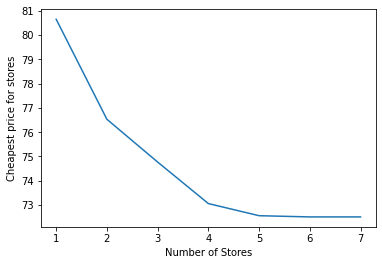

In [51]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.xlabel('Number of Stores')
plt.ylabel('Cheapest price for stores')
plt.show()

Take a look at the graph. How useful is shopping at different stores?

## Task 3 (Optional) - Using Nutritional Information

So far, we've found that some decent savings can be made by just changing where you shop! However, if you are sticking to the same items, there is a limit to how much you can save.

This task will take a look at the food you pick, and see how much you can save by changing what you eat (whilst still getting all the nutrition you need!)

####Loading the data
First, lets load in and take a look at a new dataset we are introducing, a table of nutritional information on a wide selection of items. 

This dataset was sourced from https://world.openfoodfacts.org/

In [52]:
nutrition_df = pd.read_csv('/content/ctm-codebar-nov-22/nutrition_small.csv.gz')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [53]:
#display the dataset here so we can see what it looks like
nutrition_df

,Unnamed: 0,_id,product_name,compared_to_category,categories_tags,categories,categories_hierarchy,_keywords,nutriments.fat_100g,nutriments.proteins_100g,nutriments.sugars_100g,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr
0,2,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,"[""whole"",""sweetened"",""chip"",""banana""]",28.570000,3.570000,14.290000,0.000000,536.000000,64.290000,NaN,NaN,"[""en:united-states""]",2
1,3,4559,Peanuts,NaN,NaN,NaN,NaN,"[""glasser"",""torn"",""peanut""]",17.860000,17.860000,17.860000,0.635000,464.000000,60.710000,NaN,NaN,"[""en:united-states""]",3
2,4,16087,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,"[""grizzlie"",""organic"",""nut"",""mix"",""salted""]",57.140000,17.860000,3.570000,1.224280,607.000000,17.860000,NaN,NaN,"[""en:united-states""]",4
3,5,16094,Organic Polenta,NaN,NaN,NaN,NaN,"[""organic"",""polenta"",""red"",""mill"",""bob""]",1.430000,8.570000,NaN,NaN,371.000000,77.140000,NaN,NaN,"[""en:united-states""]",5
4,6,16100,Breadshop Honey Gone Nuts Granola,NaN,NaN,NaN,NaN,"[""granola"",""gone"",""breadshop"",""unfi"",""nut"",""ho...",18.270000,13.460000,11.540000,NaN,462.000000,63.460000,NaN,NaN,"[""en:united-states""]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228264,840627,0044100605031,Cow Chow Ice Cream,NaN,NaN,NaN,NaN,"[""cream"",""chow"",""cow"",""ice""]",10.227273,4.545455,21.590909,0.326705,238.636364,31.818182,NaN,NaN,"[""en:united-states""]",840627
228265,840629,0810785020274,Extra Virgin Olive Oil,NaN,NaN,NaN,NaN,"[""extra"",""oil"",""virgin"",""olive""]",93.333333,0.000000,0.000000,0.000000,800.000000,0.000000,NaN,NaN,"[""en:united-states""]",840629
228266,840632,400249284320000299,Choco Hazelnut Bear Cookies,NaN,NaN,NaN,NaN,"[""cookie"",""bear"",""choco"",""hazelnut""]",25.000000,5.000000,25.000000,0.625000,500.000000,65.000000,NaN,NaN,"[""en:united-states""]",840632
228267,840633,0818850020686,seaweed green tea snack,NaN,NaN,NaN,NaN,"[""snack"",""seaweed"",""tea"",""green""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""en:united-states""]",840633


As you can see, there is a vast collection of nutritional information on a large variety of foods. However, there is one big issue - how do we link this information to the prices of the products?

#### Introducing the similarity join

If you compare the pricing dataframe and the nutritional dataframe side by side, just by looking at the product names you can see that there are a lot of products that are in both!

But, that names are not exactly the same, even though we know they are  referring to the same product.

How do we match these products together? We can use a tool called [py-stringsimjoin](http://anhaidgroup.github.io/py_stringsimjoin/v0.3.2/overview.html) for performing a method called a **similarity join**

In [54]:
!pip install py-stringsimjoin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 32.8 MB/s 
     |████████████████████████████████| 661 kB 53.1 MB/s 
  Created wheel for py-stringsimjoin: filename=py_stringsimjoin-0.3.2-cp37-cp37m-linux_x86_64.whl size=3724139 sha256=e0250a71aea32d524a9a18cd3594eb0a1785f3d4542513ce9637b9f1350b29dc
  Stored in directory: /root/.cache/pip/wheels/7c/0d/a4/c0a779a4d196bed8ed41ca12be09a93e158e4fc974b59f9fd5
  Created wheel for py-stringmatching: filename=py_stringmatching-0.4.2-cp37-cp37m-linux_x86_64.whl size=2055520 sha256=1bbf8b30d9d5083f4c9a06497ce3f4e0dd4378750348993dbcf39373436568cc
  Stored in directory: /root/.cache/pip/wheels/7e/12/86/46f9378ae730550dd2f89cad50880e70d66cabedd90074f2d2
Successfully built py-stringsimjoin py-stringmatching


In [55]:
import py_stringsimjoin as ssj
import py_stringmatching as sm

####What is a similarity join?
At its core, a similarity join takes a look at 2 strings, and gives them a score based on how similar they are to each other.

Lets take a look at 2 products -

`Coke Can 250ml`

`Diet Coke Can 330ml`

We can split these names into individual words (sometimes referred to as tokens)

`[Coke, Can, 250ml]`

`[Diet, Coke, Can, 330ml]`

To compute a *Jaccard* similarity score:

$\text{Score} = \frac{ \text{Number of shared words} }{ \text{Total number of unique words}}$

In this case, the shared words are:

`[Coke, Can]`

and all the unique words between the 2 strings are:

`[Diet, Coke, Can, 250ml, 330ml]`

therefore: 

$\text{Score} = \frac{2}{5} = 0.4$

The higher the score is, the more similar the strings are. The lower the score is, the less similar the strings are.

#### Tokenisation

The first thing we need is a method to split strings into individual words/tokens.

The variable below contains an [alphanumeric tokenizer](https://anhaidgroup.github.io/py_stringmatching/v0.4.2/AlphanumericTokenizer.html), which takes strings and splits into individual words, ignoring any characters that aren't numbers or letters.

In [56]:
alnum_tok = sm.AlphanumericTokenizer(return_set=True)

Lets give this a try:

In [57]:
print('Diet Coke', alnum_tok.tokenize('Diet Coke'))
print('Diet-Coke', alnum_tok.tokenize('Diet-Coke'))

Diet Coke ['Diet', 'Coke']
Diet-Coke ['Diet', 'Coke']


### Before We Join:

The goal of joining is to pick the 'best' match from the possible options.
If there are multiple matches for the same product, we would want to prioritise:
- products that are from the UK
- products that have nutritional information filled out.

We also want to make sure all the product names are in lowercase.

In [58]:
nutrition_columns = [
    'nutriments.fat_100g',
    'nutriments.proteins_100g',
    'nutriments.sugars_100g',
    'nutriments.salt_100g',
    'nutriments.energy-kcal_100g',
    'nutriments.carbohydrates_100g'
    ]

#this is required by the join module.
nutrition_df['uid'] = range(0, len(nutrition_df))

#add a true/false column to check if the row has nutritional info
nutrition_df['has_nutritional_info'] = nutrition_df[nutrition_columns].notna().any(axis='columns')

#add a true/false column to check if the product is from the UK
nutrition_df['is_uk'] = nutrition_df['countries_tags'].apply(lambda x: ('en:united-kingdom' in eval(x)) if isinstance(x, str) else False)

#add a column to both dataframes with the product names in lowercase
nutrition_df['product_name_lower'] = nutrition_df['product_name'].apply(lambda x: x.lower())
product_df['name_lower'] = product_df['name'].apply(lambda x: x.lower())

###Perform the join

Next, lets perform the join!
This function creates a table of all the possible matches for each product, and their similarity score. It is important to pick a threshold/minimum score, so that matches with a score lower than this are not included.

In [59]:
# Feel free to change this to see how it affects the results.
similarity_threshold = 0.6

output_pairs = ssj.jaccard_join(
    product_df, nutrition_df, 
    'id', 'uid', 'name_lower', 'product_name_lower', 
    alnum_tok, similarity_threshold, 
    l_out_attrs=['name'], r_out_attrs=['product_name', 'has_nutritional_info', 'is_uk'])

/usr/local/lib/python3.7/dist-packages/py_stringsimjoin/utils/generic_helper.py:77: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  subset=[join_attr])
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


###Pick the best Match:

The `output_pairs` has multiple results for each product. Next, we want to pick the best match for each product and remove all the duplicates

In [60]:
deduped_pairs = output_pairs.sort_values(['_sim_score', 'r_has_nutritional_info', 'r_is_uk'], ascending=False).drop_duplicates(['l_id'])
deduped_pairs

,_id,l_id,r_uid,l_name,r_product_name,r_has_nutritional_info,r_is_uk,_sim_score
2012,2012,22723,3696,Sweet Baby Ray's Barbecue Sauce,Sweet Baby Ray's Barbecue Sauce,True,True,1.0
3769,3769,95105,6942,Candy Canes,Candy canes,True,True,1.0
15472,15472,83092,28005,Jammie Dodgers,Jammie dodgers,True,True,1.0
15474,15474,102044,28006,Cadbury Fingers Milk Chocolate Biscuits,Cadbury Fingers Milk Chocolate Biscuits,True,True,1.0
22606,22606,23100,41077,Diet Coke,Diet Coke,True,True,1.0
...,...,...,...,...,...,...,...,...
139572,139572,75976,225710,M&S Somerset Vintage Cider,Somerset Vintage Cider,False,False,0.6
139573,139573,120190,225710,Chaplin & Corks Somerset Vintage Cider,Somerset Vintage Cider,False,False,0.6
140308,140308,48791,227092,Lynx Africa Body Spray Deodorant,Africa Deodorant Spray,False,False,0.6
140330,140330,31699,227182,Woods Old Navy Rum,Old Captain Navy Rum,False,False,0.6


### Join the prices with nutrition
Now we have the matching table, lets make use of that to join the prices table and nutrition table together! For this, we will use [df.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), which joins 2 tables together based on their ids.

In [61]:
#join the prices with the pairs table
combined_df = price_df.merge(deduped_pairs,left_on='id',right_on='l_id')

#join the combined table with the nutrition table
combined_df = combined_df.merge(nutrition_df,left_on='r_uid',right_on='uid')
combined_df

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date,_id_x,...,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,uid,has_nutritional_info,is_uk,product_name_lower
0,20100,Lucozade Sport Orange,asda,True,1.25,0.17,100.0,ml,2022-10-26T15:00:00.000Z,54344,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
1,27043,Lucozade Sport Orange,coop,NaN,2.50,NaN,NaN,NaN,2022-10-26T10:00:00.000Z,54347,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
2,27043,Lucozade Sport Orange,asda,True,3.00,0.15,100.0,ml,2022-10-26T10:00:00.000Z,54347,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
3,27043,Lucozade Sport Orange,sainsburys,True,3.00,0.15,100.0,ml,2022-10-26T12:00:00.000Z,54347,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
4,27043,Lucozade Sport Orange,tesco,True,3.00,0.15,100.0,ml,2022-10-26T10:00:00.000Z,54347,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24305,140564,Schwartz Classic BBQ Seasoning,tesco,True,1.85,4.20,100.0,g,2022-10-26T09:00:00.000Z,55829,...,277.0,38.0,NaN,NaN,"[""en:united-kingdom""]",258637,86313,True,True,schwartz bbq seasoning
24306,140564,Schwartz Classic BBQ Seasoning,coop,NaN,1.95,NaN,NaN,NaN,2022-10-26T09:00:00.000Z,55829,...,277.0,38.0,NaN,NaN,"[""en:united-kingdom""]",258637,86313,True,True,schwartz bbq seasoning
24307,140640,Morrisons Buttermilk,morrisons,True,0.99,0.33,100.0,ml,2022-10-26T14:00:00.000Z,126547,...,41.0,3.6,NaN,NaN,"[""en:united-kingdom""]",745031,202557,True,True,buttermilk morrisons
24308,149216,TRIP CBD Infused Peach Ginger,ocado,True,2.00,0.80,100.0,ml,2022-10-26T14:00:00.000Z,119806,...,375.0,100.0,NaN,NaN,"[""en:united-states""]",703276,190856,True,False,peach ginger cbd infused drink


### Looking at nutrition and prices

Next, lets use our new table to find out what the cheapest products are for the nutritional value they provide!

First, lets increase the amount of data we can see to better see our results:

In [62]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Next, we should filter the combined table to remove missing data, and pick only the most nutritious food. 

We will also need to make sure both the price and nutrition are using the same units (per 100g).

In [63]:
combined_filter = (
    combined_df['price_unit_amount'] == 100
    ) & (combined_df['nutriments.energy-kcal_100g'].notna()
    ) & (combined_df['nutriments.energy-kcal_100g'] > 0
    ) & (combined_df['price_per_unit'] > 0
    ) & (combined_df['nutriscore_grade'].isin(['a','b'])
)

df_to_analyse = combined_df[combined_filter].copy(deep=True)

Next, let create a new column to work out the cost for a full days worth of calories from each product, and use it to find the cheapest products

In [64]:
#Work out the price per 2000 calories for each product
df_to_analyse['price_per_2000kcal'] = (df_to_analyse['price_per_unit'] / df_to_analyse['nutriments.energy-kcal_100g']) * 2000
df_to_analyse.sort_values('price_per_2000kcal').head(100)

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date,_id_x,l_id,r_uid,l_name,r_product_name,r_has_nutritional_info,r_is_uk,_sim_score,Unnamed: 0,_id_y,product_name,compared_to_category,categories_tags,categories,categories_hierarchy,_keywords,nutriments.fat_100g,nutriments.proteins_100g,nutriments.sugars_100g,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,uid,has_nutritional_info,is_uk,product_name_lower,price_per_2000kcal
11536,30135,ASDA No Added Sugar Cherryade,asda,True,0.80,0.04,100.0,ml,2022-10-26T11:00:00.000Z,73098,30135,114974,ASDA No Added Sugar Cherryade,No Added Sugar,True,True,0.600000,438451,5010029226218,No Added Sugar,en:breakfast-cereals,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:break...",Breakfast cereals,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:break...","[""swis"",""sugar"",""added"",""breakfast"",""style"",""museli"",""cereal"",""alpen"",""no"",""no-added-sugar""]",5.80,12.00,16.00,0.2800,369.00,63.00,a,-2.0,"[""en:france"",""en:united-kingdom""]",438451,114974,True,True,no added sugar,0.216802
19768,89471,Ocado British Plain Flour,ocado,True,0.58,0.04,100.0,g,2022-10-26T12:00:00.000Z,273,89471,488,Ocado British Plain Flour,British Plain Flour,True,True,0.750000,1193,53327,British Plain Flour,en:cereal-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""beverage"",""potatoe"",""their"",""wheat"",""vegetarian"",""sainsbury"",""and"",""cereal"",""plain"",""product"",...",1.00,9.70,0.50,0.0300,342.00,71.70,a,-4.0,"[""en:united-kingdom""]",1193,488,True,True,british plain flour,0.233918
20078,91906,Ocado British Self Raising Flour,ocado,True,0.58,0.04,100.0,g,2022-10-25T09:00:00.000Z,293,91906,511,Ocado British Self Raising Flour,British Self Raising Flour,True,True,0.800000,1240,88886,British Self Raising Flour,en:wheat-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""their"",""self"",""food"",""and"",""cereal"",""vegetarian"",""mark"",""flour"",""royaume-uni"",""product"",""potat...",1.10,9.50,0.50,0.8300,335.00,69.90,a,-1.0,"[""en:france"",""en:united-kingdom""]",1240,511,True,True,british self raising flour,0.238806
417,133804,Morrisons Plain Flour,morrisons,True,0.75,0.05,100.0,g,2022-10-26T15:00:00.000Z,34511,133804,63869,Morrisons Plain Flour,Plain Flour,True,True,0.666667,177272,27429464,Plain Flour,en:wheat-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""asda"",""and"",""potatoe"",""plain"",""product"",""food"",""cereal"",""vegetarian"",""plant-based"",""their"",""wh...",1.70,9.90,0.50,0.0300,357.00,74.00,a,-5.0,"[""en:united-kingdom""]",177272,63869,True,True,plain flour,0.280112
3298,22357,Daily's Porridge Oats 1kg,sainsburys,True,0.70,0.07,100.0,g,2022-10-26T14:00:00.000Z,87774,22357,134231,Daily's Porridge Oats 1kg,Daily's Porridge Oats,True,True,0.800000,503416,00378208,Daily's Porridge Oats,en:porridge,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:breakfasts"",""en:cereals-and-pot...","Plant-based foods

You can now also have a look at the other nutrition columns to see if other foods are better for other types of nutrition.

In [65]:
df_to_analyse['price_per_50g_protein'] = (df_to_analyse['price_per_unit'] / df_to_analyse['nutriments.proteins_100g']) * 50
df_to_analyse.sort_values('price_per_50g_protein').head(100)

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date,_id_x,l_id,r_uid,l_name,r_product_name,r_has_nutritional_info,r_is_uk,_sim_score,Unnamed: 0,_id_y,product_name,compared_to_category,categories_tags,categories,categories_hierarchy,_keywords,nutriments.fat_100g,nutriments.proteins_100g,nutriments.sugars_100g,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,uid,has_nutritional_info,is_uk,product_name_lower,price_per_2000kcal,price_per_50g_protein
11536,30135,ASDA No Added Sugar Cherryade,asda,True,0.80,0.04,100.0,ml,2022-10-26T11:00:00.000Z,73098,30135,114974,ASDA No Added Sugar Cherryade,No Added Sugar,True,True,0.600000,438451,5010029226218,No Added Sugar,en:breakfast-cereals,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:break...",Breakfast cereals,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:break...","[""swis"",""sugar"",""added"",""breakfast"",""style"",""museli"",""cereal"",""alpen"",""no"",""no-added-sugar""]",5.80,12.00,16.00,0.2800,369.00,63.00,a,-2.0,"[""en:france"",""en:united-kingdom""]",438451,114974,True,True,no added sugar,0.216802,0.166667
19768,89471,Ocado British Plain Flour,ocado,True,0.58,0.04,100.0,g,2022-10-26T12:00:00.000Z,273,89471,488,Ocado British Plain Flour,British Plain Flour,True,True,0.750000,1193,53327,British Plain Flour,en:cereal-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""beverage"",""potatoe"",""their"",""wheat"",""vegetarian"",""sainsbury"",""and"",""cereal"",""plain"",""product"",...",1.00,9.70,0.50,0.0300,342.00,71.70,a,-4.0,"[""en:united-kingdom""]",1193,488,True,True,british plain flour,0.233918,0.206186
20078,91906,Ocado British Self Raising Flour,ocado,True,0.58,0.04,100.0,g,2022-10-25T09:00:00.000Z,293,91906,511,Ocado British Self Raising Flour,British Self Raising Flour,True,True,0.800000,1240,88886,British Self Raising Flour,en:wheat-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""their"",""self"",""food"",""and"",""cereal"",""vegetarian"",""mark"",""flour"",""royaume-uni"",""product"",""potat...",1.10,9.50,0.50,0.8300,335.00,69.90,a,-1.0,"[""en:france"",""en:united-kingdom""]",1240,511,True,True,british self raising flour,0.238806,0.210526
417,133804,Morrisons Plain Flour,morrisons,True,0.75,0.05,100.0,g,2022-10-26T15:00:00.000Z,34511,133804,63869,Morrisons Plain Flour,Plain Flour,True,True,0.666667,177272,27429464,Plain Flour,en:wheat-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""asda"",""and"",""potatoe"",""plain"",""product"",""food"",""cereal"",""vegetarian"",""plant-based"",""their"",""wh...",1.70,9.90,0.50,0.0300,357.00,74.00,a,-5.0,"[""en:united-kingdom""]",177272,63869,True,True,plain flour,0.280112,0.252525
3298,22357,Daily's Porridge Oats 1kg,sainsburys,True,0.70,0.07,100.0,g,2022-10-26T14:00:00.000Z,87774,22357,134231,Daily's Porridge Oats 1kg,Daily's Porridge Oats,True,True,0.800000,503416,00378208,Daily's Porridge Oats,en:porridge,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""e

What do you think of the results you've found so far? Would you actually change what you eat based on it?

## Task 4 (Optional) - Categorising the products

Rather than forcing people to change what they eat, an alternative approach to saving money is picking alternative items for whats in their basket.

For example, most supermarkets have their own brand of milk, which only they sell:

In [66]:
product_df[product_df['id'] == 43060]

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count,name_lower
20239,43060,Sainsbury's British Whole Milk 3.4L (6 pint),NaN,3400,ml,['425605'],1,sainsbury's british whole milk 3.4l (6 pint)


This makes it difficult to directly compare Sainsbury's milk with Tesco's milk for example, using our current prices dataframe.

It also makes it difficult to compare different quantities (e.g. 4 pints of milk vs 6 pints of milk), to find what is actually cheaper.

###Using Categories

However, if we take a look at the nutrition dataframe, we can see that in the field `categories_hierarchy`, we do have categories!


In [67]:
nutrition_df[nutrition_df['categories_hierarchy'].notna()].head(5)

,Unnamed: 0,_id,product_name,compared_to_category,categories_tags,categories,categories_hierarchy,_keywords,nutriments.fat_100g,nutriments.proteins_100g,nutriments.sugars_100g,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,uid,has_nutritional_info,is_uk,product_name_lower
46,57,30717,Organic Baby Lima Beans,en:butter-beans,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:legumes-and-their-products"",""en...","Plant-based foods and beverages, Plant-based foods, Legumes and their products, Legumes, Seeds, ...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:legumes-and-their-products"",""en...","[""organic"",""and"",""pulse"",""legume"",""plant-based"",""baby"",""beverage"",""unfi"",""butter"",""seed"",""produc...",NaN,20.00,8.89,0.02794,333.0,62.22,NaN,NaN,"[""en:united-states""]",57,46,True,False,organic baby lima beans
118,145,43595,Cranberries,en:cranberries,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:fruits-and-vegetables-based-foo...","Plant-based foods and beverages, Plant-based foods, Fruits and vegetables based foods, Fruits ba...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:fruits-and-vegetables-based-foo...","[""cranberrie"",""torn"",""glasser""]",0.00,0.00,66.67,0.00000,300.0,83.33,c,3.0,"[""en:united-states""]",145,118,True,False,cranberries
149,185,20043131,Sliced Plain Bagel,en:bagel-breads,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:bread...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Breads, Special breads...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:bread...","[""pain"",""fresh"",""sliced"",""plain"",""easy"",""bagel""]",1.18,12.94,4.71,1.19634,365.0,71.76,c,3.0,"[""en:united-states""]",185,149,True,False,sliced plain bagel
152,195,20047825,Apple Turnover,en:apple-turnovers,"[""en:snacks"",""en:sweet-snacks"",""en:viennoiseries"",""en:apple-turnovers""]","Snacks, Sweet snacks, Viennoiseries, Apple turnovers","[""en:snacks"",""en:sweet-snacks"",""en:viennoiseries"",""en:apple-turnovers""]","[""turnover"",""easy"",""fresh"",""apple"",""apple-turnover""]",22.35,4.71,15.29,0.80772,388.0,42.35,d,18.0,"[""en:united-states""]",195,152,True,False,apple turnover
156,205,27533024,Luxury Christmas Pudding,en:christmas-puddings,"[""en:desserts"",""en:puddings"",""en:christmas-puddings""]","Desserts, Puddings, Christmas Puddings","[""en:desserts"",""en:puddings"",""en:christmas-puddings""]","[""pudding"",""luxury"",""special"",""christma"",""dessert"",""extra"",""asda""]",7.00,3.90,44.00,0.20000,NaN,54.20,d,11.0,"[""en:united-kingdom""]",205,156,True,True,luxury christmas pudding


Our biggest problem here, however, is that a lot of the products from the products data frame don't have a good match to a product in the nutrition dataframe.

If only we had a way to take a look at a product's name and figure out what categories it belongs to...

###Introducing Classification/Labelling

Using the power of machine learning, we can build a model that learns from a dataset of product names, and the categories they belong to, and uses it to predict the categories of new product names!

###Data Preparation

The first thing we need to do is to clean up and prepare the data so that its ready to be used by a model. The first step here is to turn the categories from a [string](https://docs.python.org/3/library/stdtypes.html#textseq) to a [list](https://docs.python.org/3/library/stdtypes.html#lists) - this will make it easier to use later on, as it makes it easier to access the individual categories for each product.

In [68]:
#The categories are currently saved as a string - this turns them into a list
nutrition_df['categories_list'] = nutrition_df['categories_hierarchy'].apply(lambda x: eval(x) if isinstance(x, str) else [])

The next thing we want to do is remove any non english categories, and any products without categories - its important to keep the data we use to only useful information - 'bad' rows will affect our results.

In [69]:
#We only want to focus on products with english categories - this removes non english categories, and then removes products without categories
en_nutrition_df = nutrition_df[nutrition_df['categories_list'].apply(lambda x: (len(x) > 0) and len([not_en for not_en in x if not_en.split(':')[0] != 'en']) == 0)].copy()

For a model to learn how to categorize products correctly, it will need lots of examples to learn from! 

If it doesn't have enough examples for each category, it won't be able to correctly identify that category, and that will affect the other results as well.

The next stage is to figure out which categories to use by counting how many examples we have for each one, and creating a list of categories to use, based on a minimum count. Try experimenting the the minimum count to see how it affects results.

In [70]:
# This is the minimum number of examples there has to be of each category for it to be included in our model.
minimum_count_threshold = 200

# There are some terms with occurrence as low as 1.
terms_list = []
for category_list in en_nutrition_df['categories_list']:
  for c in category_list:
    terms_list.append(c)
len(terms_list)

categories_df = pd.DataFrame(terms_list, columns=['category'])
column_counts = categories_df.groupby('category').size().reset_index(name='count')
categories_to_use = column_counts[column_counts['count'] > minimum_count_threshold]
categories_to_use.values

array([['en:Baking decorations', 523],
       ['en:Mexican Dinner Mixes', 345],
       ['en:Salted snacks', 1926],
       ['en:Vegetable mixes', 337],
       ['en:alcoholic-beverages', 1048],
       ['en:almonds', 294],
       ['en:animal-fats', 303],
       ['en:appetizers', 1390],
       ['en:apple-juices', 281],
       ['en:artificially-sweetened-beverages', 422],
       ['en:barbecue-sauces', 300],
       ['en:bars', 678],
       ['en:bee-products', 722],
       ['en:beef-jerkies', 288],
       ['en:beers', 365],
       ['en:berries', 232],
       ['en:berry-jams', 214],
       ['en:beverages', 12770],
       ['en:biscuits', 2992],
       ['en:biscuits-and-cakes', 6557],
       ['en:bodybuilding-supplements', 553],
       ['en:bonbons', 323],
       ['en:breaded-products', 234],
       ['en:breads', 2344],
       ['en:breakfast-cereals', 883],
       ['en:breakfasts', 2888],
       ['en:butters', 282],
       ['en:cake-mixes', 499],
       ['en:cakes', 2472],
       ['en:candies', 

For training purposes, we want to make sure that there are atleast 2 examples of each combination of categories - this will explained later in more detail - this is used for the train test split.

To do this, we need to make a list of combinations to drop.

In [71]:
# This creates a list of combinations to drop.
hierarchy_df = en_nutrition_df.groupby('categories_hierarchy').size().reset_index(name='count')
categories_to_drop = hierarchy_df[hierarchy_df['count'] < 2]
categories_to_drop

,categories_hierarchy,count
1,"[""en:1% Low Fat Milk with Added Milk Protein""]",1
2,"[""en:100 calories per bar. Milk Chocolate. No artificial colours"",""en:Flavours or preservatives.""]",1
3,"[""en:100% Beef""]",1
4,"[""en:100% natural""]",1
5,"[""en:116""]",1
...,...,...
8281,"[""en:Хлопья""]",1
8282,"[""en:Хөлдүү""]",1
8283,"[""en:יעכ""]",1
8284,"[""en:مايونيز""]",1


Finally, we can apply the `categories_to_use` and `categories_to_drop` to filter out any unwanted data, and again remove any rows that have no categories, leaving us with a labelled dataset ready for machine learning!

In [72]:
en_nutrition_df['train_categories'] = en_nutrition_df['categories_list'].apply(lambda categories: [c for c in categories if c in categories_to_use['category'].values])
label_filter = (
    en_nutrition_df['train_categories'].apply(lambda x: len(x) > 0)
    ) & (~en_nutrition_df['categories_hierarchy'].isin(categories_to_drop['categories_hierarchy']))
labelled_nutrition_df = en_nutrition_df[label_filter]
len(labelled_nutrition_df)

95304

###Building the model

Now we have our data, we can use it to build and train a model. The design we are going to use generally follows [this tutorial.](https://keras.io/examples/nlp/multi_label_classification/). Please refer to the tutorial if you require more explanation on concepts - we will largely focus on using this design to get results 

The imports below largely come from [tensorflow](https://www.tensorflow.org/) and [scikit-learn](https://scikit-learn.org/), two common machine learning libraries.

In [73]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval
import numpy as np

####Splitting the data

The first task we need to do is split the data into a training dataset and test dataset.

The training dataset will be used by the model for learning, whilst the test dataset will be used to see how well the model is performing.

This is the reason why we needed atleast 2 examples of each category combination, so we can have atleast one in the training set, and one in the test set, to make it a fair test.

In [74]:
# this means 90% of the data will be used for training, and 10% of the data will be used for testing
test_split = 0.1

# Initial train and test split.
train_df, test_df = train_test_split(
    labelled_nutrition_df,
    test_size=test_split,
    stratify=labelled_nutrition_df["categories_hierarchy"].values,
)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 85773
Number of rows in validation set: 4766
Number of rows in test set: 4765


####String Preprocessing
With Tensorflow, and deep learning models in general, all the data going into the model needs to be represented as numbers, or vectors/arrays of numbers.

The following cell provides functionality to convert the **product name** and **categories** to a number representation.

In [75]:
terms = tf.ragged.constant(categories_to_use['category'].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(terms)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)

max_seqlen = 20
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["train_categories"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["product_name_lower"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

vocabulary = set()
train_df["product_name_lower"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)

text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=3, output_mode="tf_idf"
)

# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

This next function returns a model that we can feed data to, and train.

In [76]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(1024, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(512, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]
    )
    return shallow_mlp_model

Finally, we can train the model, using `model.fit`, to learn the categories from the product names.

The `top_k_categorical_accuracy` metric gives a rough idea of how accurate the model is at predicting the right categories.

Epoch 1/5
671/671 [==============================] - 14s 17ms/step - loss: 0.0382 - top_k_categorical_accuracy: 0.7563 - val_loss: 0.0165 - val_top_k_categorical_accuracy: 0.8852
Epoch 2/5
671/671 [==============================] - 9s 13ms/step - loss: 0.0155 - top_k_categorical_accuracy: 0.8905 - val_loss: 0.0159 - val_top_k_categorical_accuracy: 0.8838
Epoch 3/5
671/671 [==============================] - 7s 10ms/step - loss: 0.0131 - top_k_categorical_accuracy: 0.9049 - val_loss: 0.0163 - val_top_k_categorical_accuracy: 0.8768
Epoch 4/5
671/671 [==============================] - 6s 9ms/step - loss: 0.0119 - top_k_categorical_accuracy: 0.9134 - val_loss: 0.0167 - val_top_k_categorical_accuracy: 0.8773
Epoch 5/5
671/671 [==============================] - 6s 9ms/step - loss: 0.0111 - top_k_categorical_accuracy: 0.9167 - val_loss: 0.0170 - val_top_k_categorical_accuracy: 0.8762


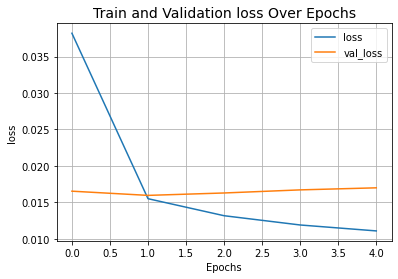

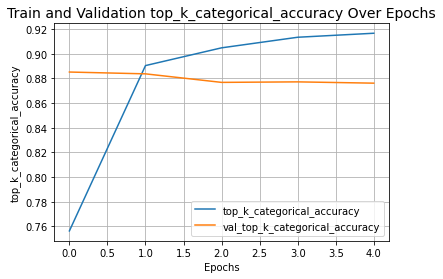

In [77]:
epochs = 5

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["top_k_categorical_accuracy"]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)


def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("top_k_categorical_accuracy")

Using the test data we saved previously, we can check how accurate this model is, on data it hasn't seen before.

In [78]:
_, categorical_acc = shallow_mlp_model.evaluate(test_dataset)


38/38 [==============================] - 0s 6ms/step - loss: 0.0161 - top_k_categorical_accuracy: 0.8816


###Using the model

Now that we have our model ready and trained, lets use it to predict the categories of all the products in the product dataframe.

In [79]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

predicted_probabilities = model_for_inference.predict(product_df['name_lower'].values)

# Perform inference.

predicted_labels = []
for i, predicted_proba in enumerate(predicted_probabilities):
    top_5_labels = [
        x
        for p, x in sorted(
            zip(predicted_proba, lookup.get_vocabulary()),
            key=lambda pair: pair[0],
            reverse=True,
        ) if p > 0.8
    ][:5]
    if i % 1000 == 0:
      print('processed {} predictions'.format(i))
    predicted_labels.append(top_5_labels)

product_df['predicted_labels'] = predicted_labels

2553/2553 [==============================] - 9s 3ms/step
processed 0 predictions
processed 1000 predictions
processed 2000 predictions
processed 3000 predictions
processed 4000 predictions
processed 5000 predictions
processed 6000 predictions
processed 7000 predictions
processed 8000 predictions
processed 9000 predictions
processed 10000 predictions
processed 11000 predictions
processed 12000 predictions
processed 13000 predictions
processed 14000 predictions
processed 15000 predictions
processed 16000 predictions
processed 17000 predictions
processed 18000 predictions
processed 19000 predictions
processed 20000 predictions
processed 21000 predictions
processed 22000 predictions
processed 23000 predictions
processed 24000 predictions
processed 25000 predictions
processed 26000 predictions
processed 27000 predictions
processed 28000 predictions
processed 29000 predictions
processed 30000 predictions
processed 31000 predictions
processed 32000 predictions
processed 33000 predictions
proc

Now that we have the predicted categories, lets use them to compare products! First, pick a category to use, and find the cheapest product in that category, per 100ml or 100g of product!

In [81]:

# Filter the products to pick only ones that match a category
bread_products = product_df[product_df['predicted_labels'].apply(lambda x: 'en:milks' in x)]

# Merge the products with the prices
bread_prices = bread_products.merge(price_df,left_on='id',right_on='id')

# Sort the prices to find the cheapest products in that category
bread_prices.sort_values('price_per_unit').head(100)

,id,name_x,measure_quantity,measure_amount,measure_unit,skus,price_count,name_lower,predicted_labels,name_y,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
129,43061,Sainsbury's British Semi Skimmed Milk 3.4L (6 pint),NaN,3400,ml,['464390'],1,sainsbury's british semi skimmed milk 3.4l (6 pint),"[en:milks, en:dairies]",Sainsbury's British Semi Skimmed Milk 3.4L (6 pint),sainsburys,True,2.19,0.06,100.0,ml,2022-10-26T14:00:00.000Z
219,131252,Morrisons British Whole Milk 6 Pints,NaN,3000,ml,['217959011'],1,morrisons british whole milk 6 pints,[en:milks],Morrisons British Whole Milk 6 Pints,morrisons,True,2.19,0.06,100.0,ml,2022-10-26T15:00:00.000Z
2,21153,Bowlands Fresh Semi Skimmed Milk,NaN,2000,ml,['16162004'],1,bowlands fresh semi skimmed milk,"[en:milks, en:dairies]",Bowlands Fresh Semi Skimmed Milk,asda,True,1.30,0.06,100.0,ml,2022-10-26T13:00:00.000Z
232,136751,Morrisons British Semi Skimmed Milk 6 Pints,NaN,3000,ml,['215941011'],1,morrisons british semi skimmed milk 6 pints,"[en:milks, en:dairies]",Morrisons British Semi Skimmed Milk 6 Pints,morrisons,True,2.19,0.06,100.0,ml,2022-10-26T15:00:00.000Z
25,28897,ASDA Semi Skimmed Milk,NaN,3408,ml,['20506'],1,asda semi skimmed milk,"[en:dairies, en:milks]",ASDA Semi Skimmed Milk,asda,True,2.19,0.06,100.0,ml,2022-10-26T10:00:00.000Z
128,43060,Sainsbury's British Whole Milk 3.4L (6 pint),NaN,3400,ml,['425605'],1,sainsbury's british whole milk 3.4l (6 pint),"[en:milks, en:dairies]",Sainsbury's British Whole Milk 3.4L (6 pint),sainsburys,True,2.19,0.06,100.0,ml,2022-10-26T12:00:00.000Z
144,51471,ASDA Skimmed Milk,NaN,2272,ml,['20505'],1,asda skimmed milk,"[en:dairies, en:milks]",ASDA Skimmed Milk,asda,True,1.55,0.07,100.0,ml,2022-10-26T10:00:00.000Z
29,31240,Dairy Pride UHT Skimmed Milk 1L,NaN,1000,ml,"['7889884', '308100946']",2,dairy pride uht skimmed milk 1l,"[en:milks, en:dairies]",Dairy Pride UHT Skimmed Milk 1L,tesco,False,0.70,0.07,100.0,ml,2022-10-26T07:00:00.000Z
28,31240,Dairy Pride UHT Skimmed Milk 1L,NaN,1000,ml,"['7889884', '308100946']",2,dairy pride uht skimmed milk 1l,"[en:milks, en:dairies]",Dairy Pride UHT Skimmed Milk 1L,sainsburys,True,0.69,0.07,100.0,ml,2022-10-26T14:00:00.000Z
141,46280,Graham's Semi Skimmed Milk,NaN,2000,ml,['1561991'],1,graham's semi skimmed milk,"[en:milks, en:dairies]",Graham's Semi Skimmed Milk,asda,True,1.50,0.07,100.0,ml,2022-10-11T13:00:00.000Z


What do think of the results? Are there products in the wrong category? Why might that be?